 Les étapes pour construire un modèle de machine learning

###################################################################################################
# Les étapes pour construire un modèle de machine learning
#####################################################################################################

1- Définition de la problématique

2- Collecte des données

3- Vérifier la qualité des données (valeurs manquantes, valeurs extrêmes, données incorrectes)

4- Sélectionner les variables les plus pertinentes

5- Tester plusieurs modèles (du plus simple au plus complexe)

6- Choisir le meilleur modèle

7- Mise en production

------------------------------------------------------------------------------

Etape 1: Définir la problématique



Problématique: prédire le prix des bien immobilier sur la base boston hosing

Etape 2: Collecte des données

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("altavish/boston-housing-dataset")

print("Path to dataset files:", path)

100%|██████████| 11.7k/11.7k [00:00<00:00, 3.19MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/altavish/boston-housing-dataset/versions/1


In [4]:
import pandas as pd

# Importation des données depuis le fichier CSV.
# Le chemin du fichier est spécifié.
data = pd.read_csv("HousingData.csv")

# Affichage des premières lignes du DataFrame pour vérification.
print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  



La base de données "Boston Housing" est un ensemble de données classique utilisé dans le domaine de l'apprentissage automatique pour la régression.  Elle contient des informations sur les logements dans la région de Boston, Massachusetts, et l'objectif principal est de prédire le prix médian des maisons dans différents quartiers.


Voici une description des variables typiques présentes dans cette base de données :


* **CRIM:** Taux de criminalité par habitant dans chaque quartier.
* **ZN:** Proportion de terrains résidentiels zonés pour les parcelles de plus de 25 000 pieds carrés.
* **INDUS:** Proportion d'acres d'entreprises non commerciales par ville.
* **CHAS:** Variable fictive indiquant la proximité de la rivière Charles (1 si le terrain borde la rivière ; 0 sinon).
* **NOX:** Concentration d'oxydes d'azote (parties par 10 millions).
* **RM:** Nombre moyen de pièces par logement.
* **AGE:** Proportion de logements occupés par leur propriétaire construits avant 1940.
* **DIS:** Distance pondérée vers cinq centres d'emploi de Boston.
* **RAD:** Indice d'accessibilité aux autoroutes radiales.
* **TAX:** Taux d'imposition foncière à valeur pleine par 10 000 $.
* **PTRATIO:** Ratio élèves-enseignants par ville.
* **B:** 1000(Bk - 0.63)^2 où Bk est la proportion de personnes d'origine africaine par ville.
* **LSTAT:** Pourcentage de la population à faible revenu.
* **MEDV:** Valeur médiane des maisons occupées par leur propriétaire en milliers de dollars (la variable cible à prédire).


En résumé, la base de données Boston Housing fournit des données socio-économiques et démographiques pour différents quartiers de Boston, ainsi que le prix médian des maisons dans ces quartiers.  Elle est souvent utilisée pour illustrer des concepts d'apprentissage automatique, notamment la régression linéaire, et pour évaluer la performance de différents modèles prédictifs.  L'objectif est d'utiliser les caractéristiques des quartiers pour prédire la valeur des biens immobiliers.

------------------------------------------------------------------------------------------------------------------


3- Vérifier la qualité des données (valeurs manquantes, valeurs extrêmes, données incorrectes)

In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# Calculer le pourcentage de valeurs manquantes pour chaque colonne
missing_values = data.isnull().sum() / len(data) * 100

# Créer un DataFrame pour afficher les résultats
missing_values_df = pd.DataFrame({'Variable': missing_values.index, 'Pourcentage de valeurs manquantes': missing_values.values})

# Trier le DataFrame par ordre décroissant du pourcentage de valeurs manquantes
missing_values_df = missing_values_df.sort_values(by='Pourcentage de valeurs manquantes', ascending=False)

# Afficher le tableau
missing_values_df

,Variable,Pourcentage de valeurs manquantes
0,CRIM,3.952569
1,ZN,3.952569
2,INDUS,3.952569
3,CHAS,3.952569
6,AGE,3.952569
12,LSTAT,3.952569
4,NOX,0.000000
5,RM,0.000000
7,DIS,0.000000
8,RAD,0.000000


In [7]:
# Supprimer les lignes avec des valeurs manquantes
data_cleaned = data.dropna()

# Afficher les premières lignes du DataFrame nettoyé
print(data_cleaned.head())

# Vérifier à nouveau le nombre de valeurs manquantes
missing_values_cleaned = data_cleaned.isnull().sum() / len(data_cleaned) * 100
missing_values_cleaned_df = pd.DataFrame({'Variable': missing_values_cleaned.index, 'Pourcentage de valeurs manquantes': missing_values_cleaned.values})
missing_values_cleaned_df = missing_values_cleaned_df.sort_values(by='Pourcentage de valeurs manquantes', ascending=False)
missing_values_cleaned_df

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
5  0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
5  394.12   5.21  28.7  


,Variable,Pourcentage de valeurs manquantes
0,CRIM,0.0
1,ZN,0.0
2,INDUS,0.0
3,CHAS,0.0
4,NOX,0.0
5,RM,0.0
6,AGE,0.0
7,DIS,0.0
8,RAD,0.0
9,TAX,0.0


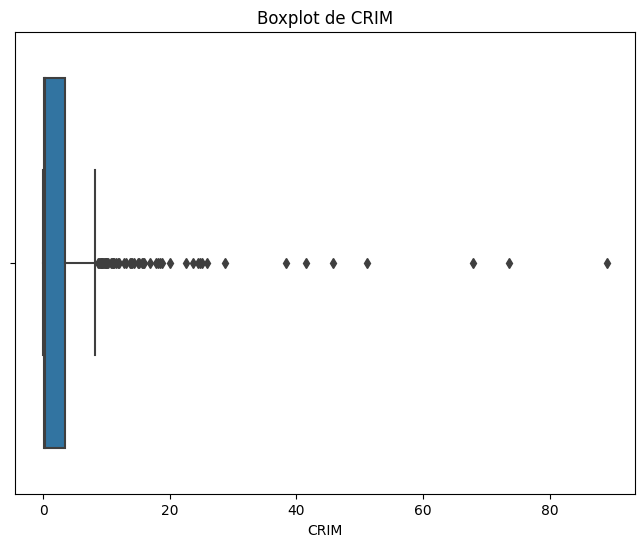

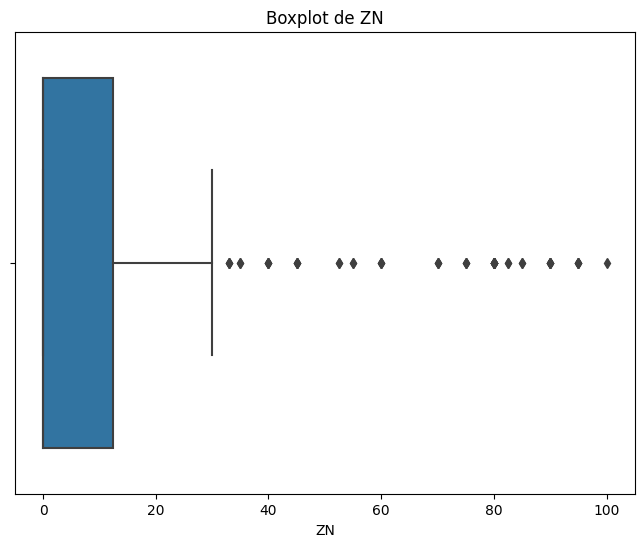

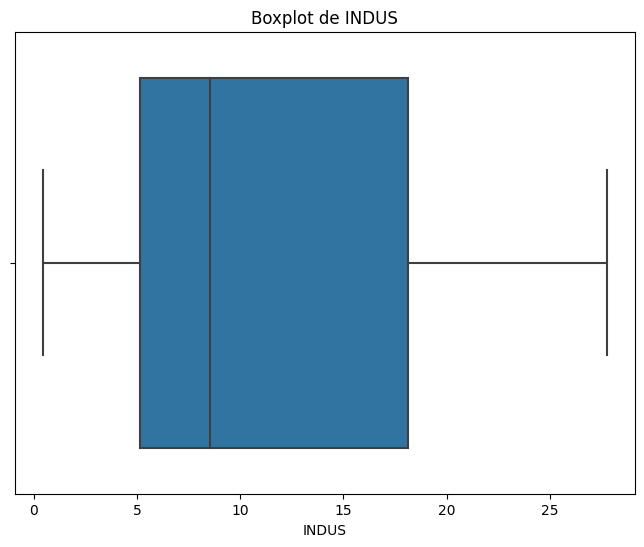

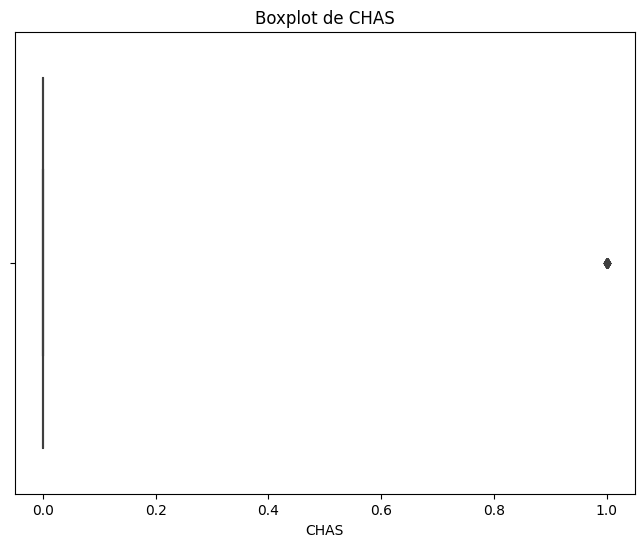

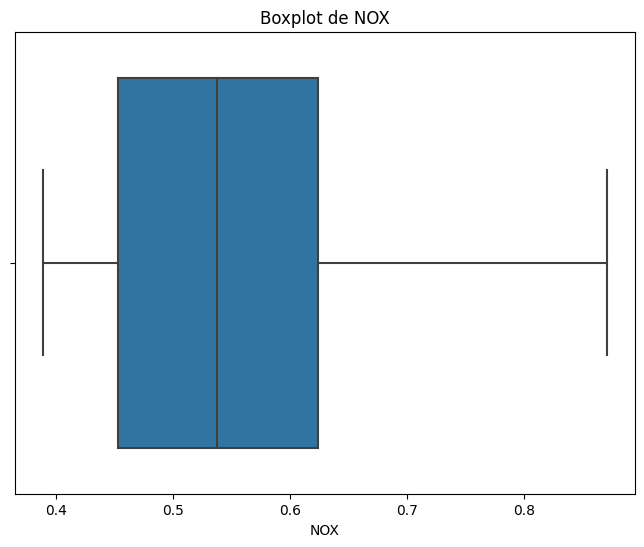

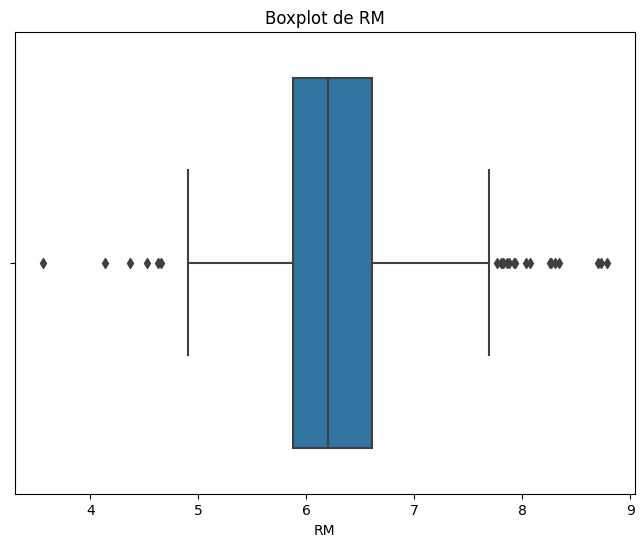

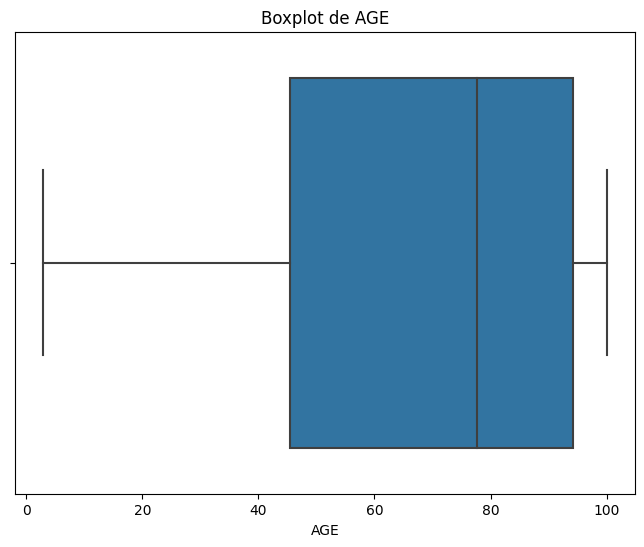

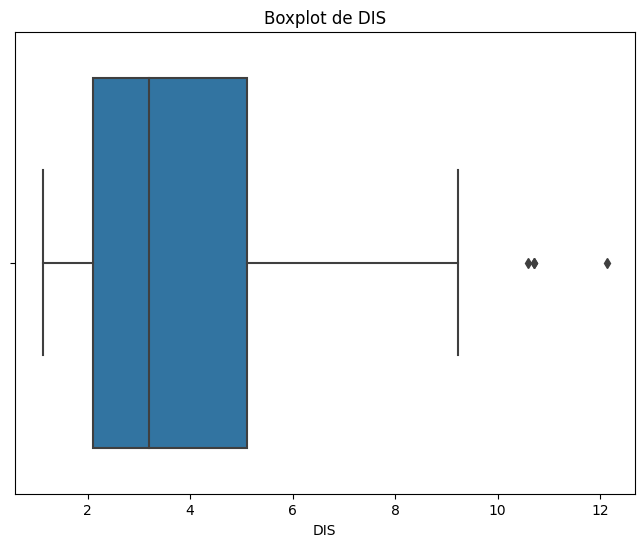

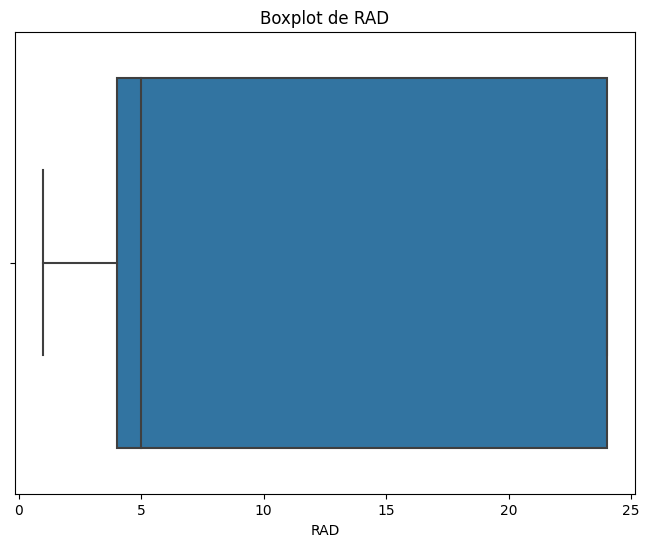

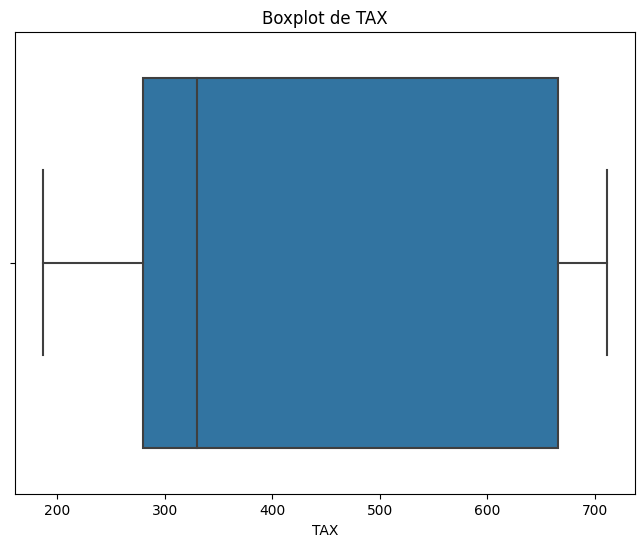

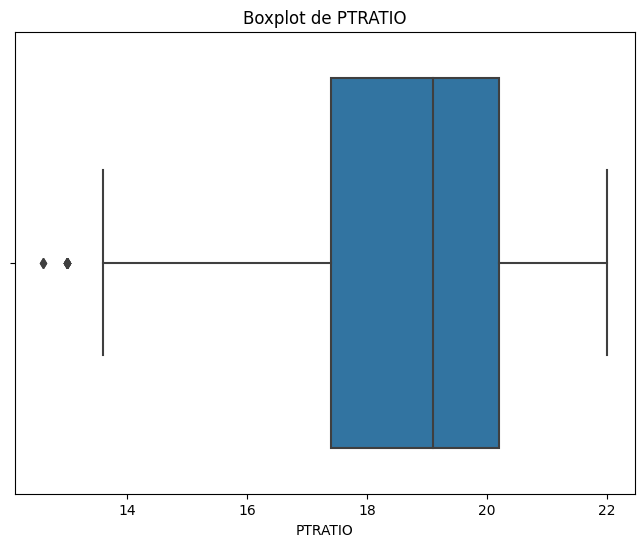

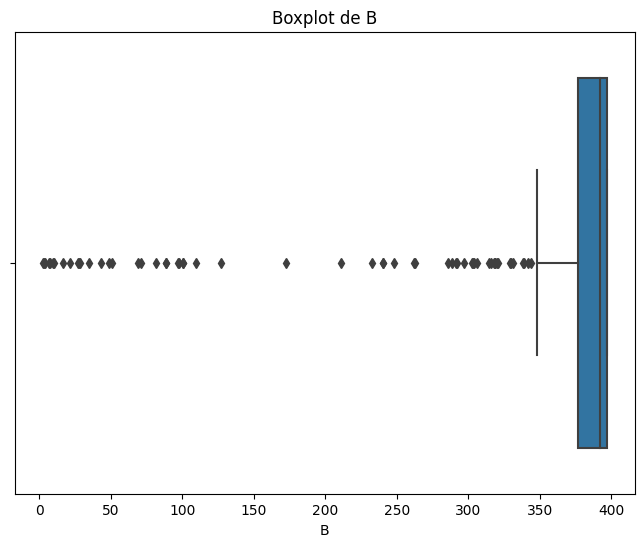

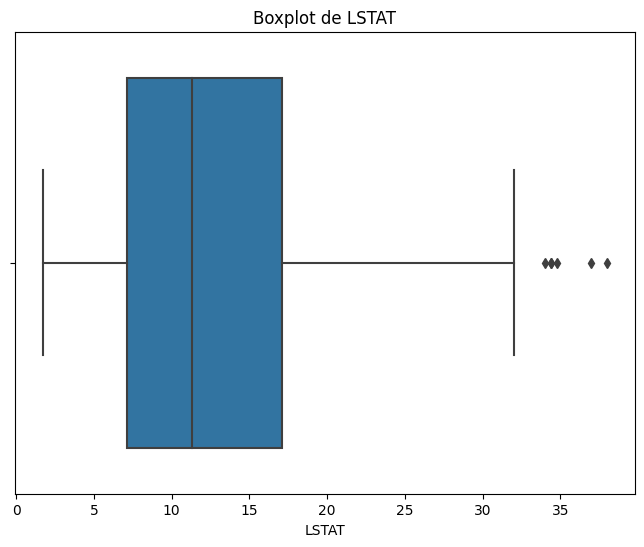

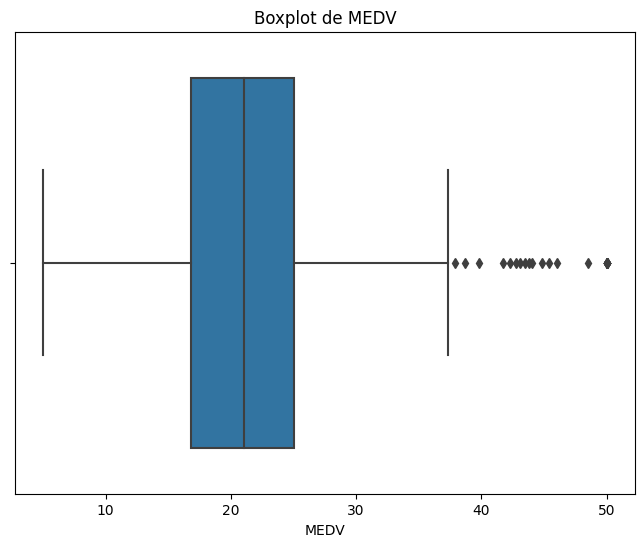

In [8]:

import matplotlib.pyplot as plt
import seaborn as sns

# Sélectionner uniquement les colonnes numériques
numerical_cols = data_cleaned.select_dtypes(include=['number'])

# Créer les boxplots pour chaque colonne numérique
for col in numerical_cols.columns:
  plt.figure(figsize=(8, 6))  # Ajuster la taille de la figure si nécessaire
  sns.boxplot(x=data_cleaned[col])
  plt.title(f'Boxplot de {col}')
  plt.show()

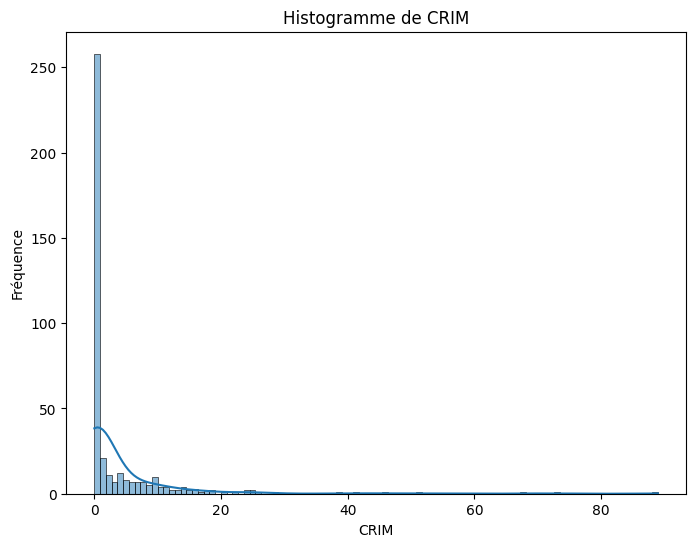

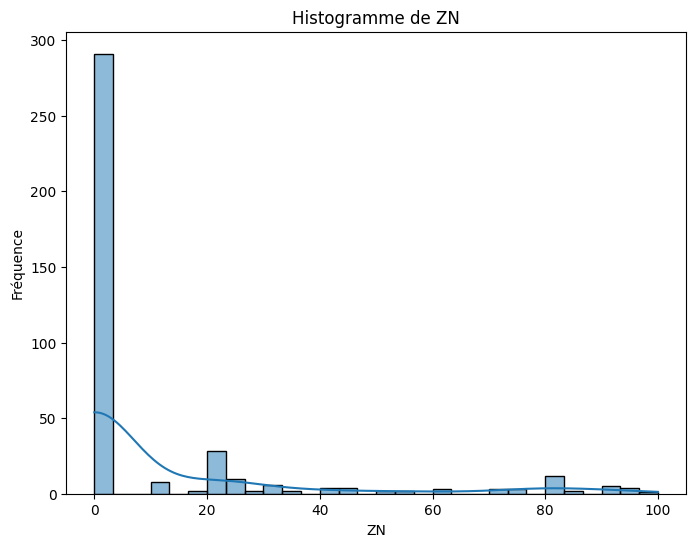

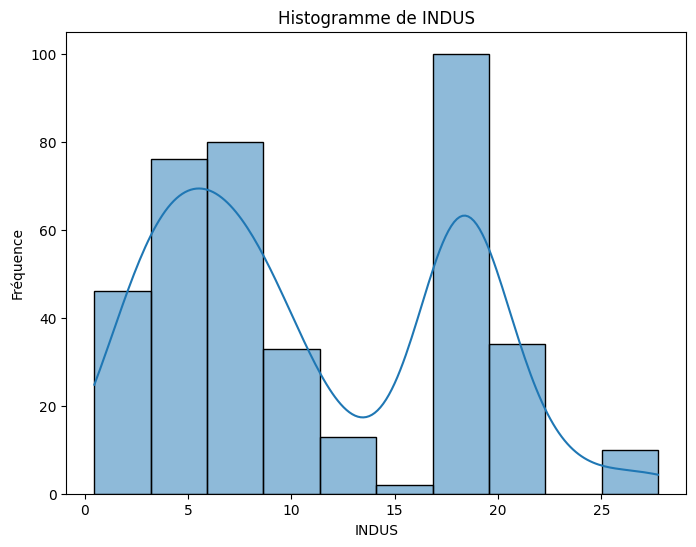

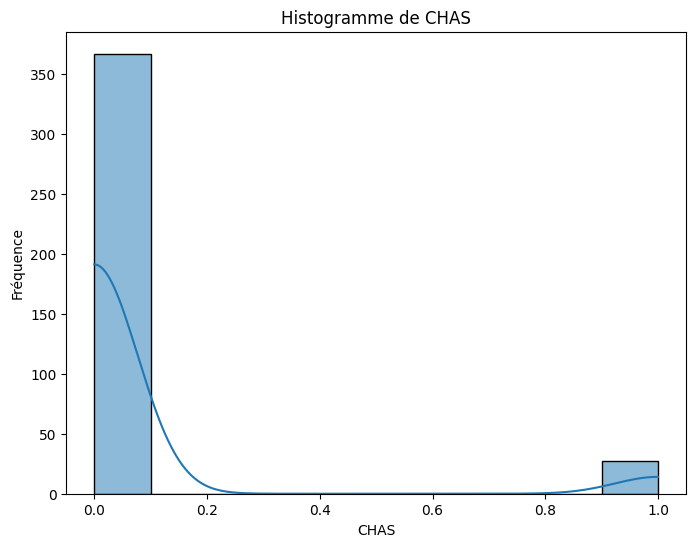

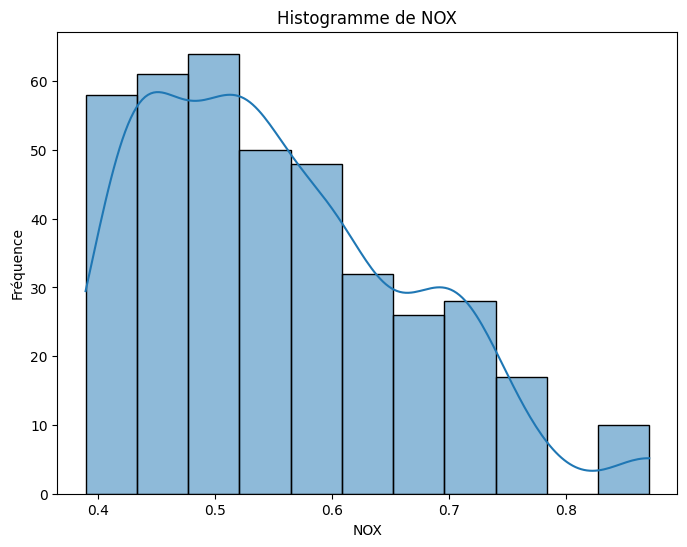

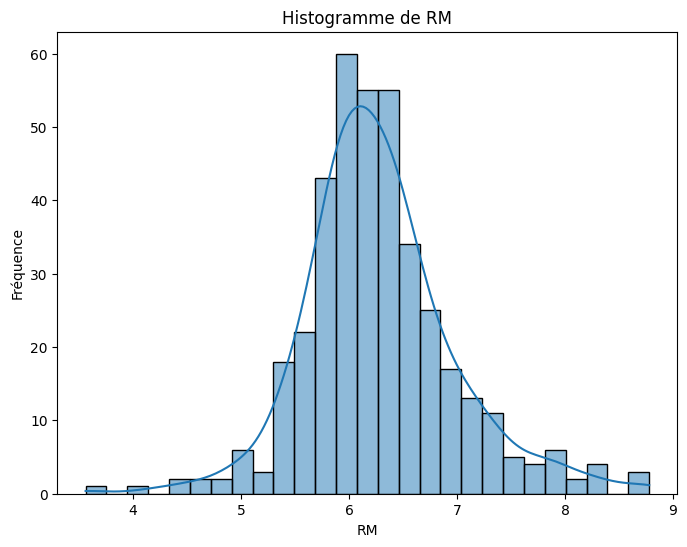

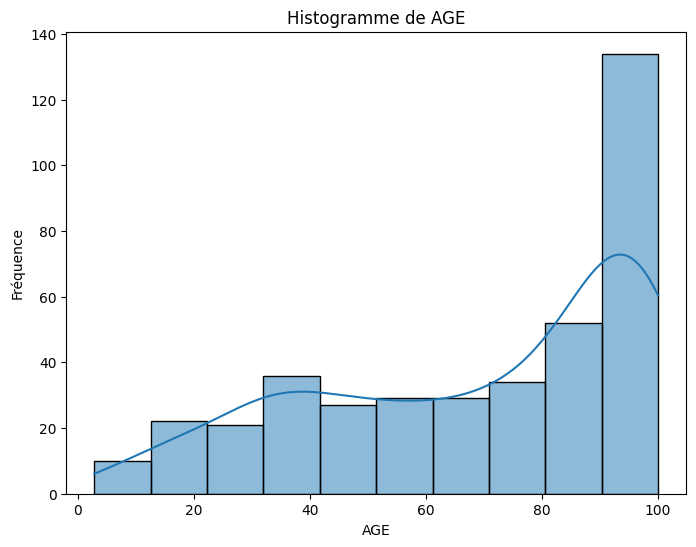

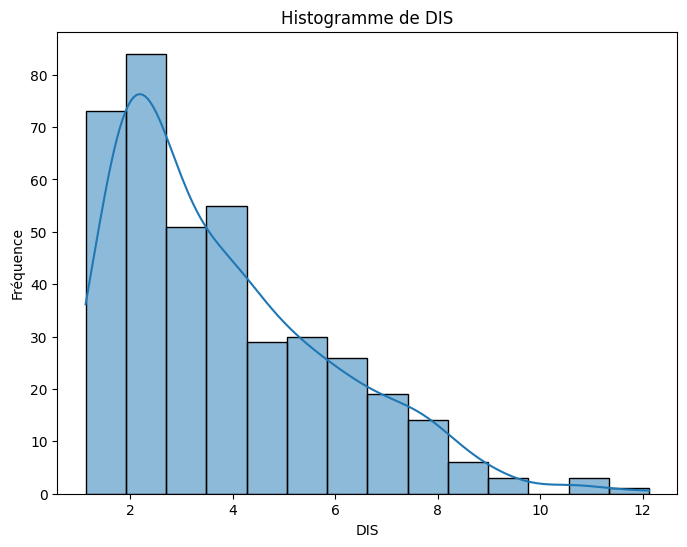

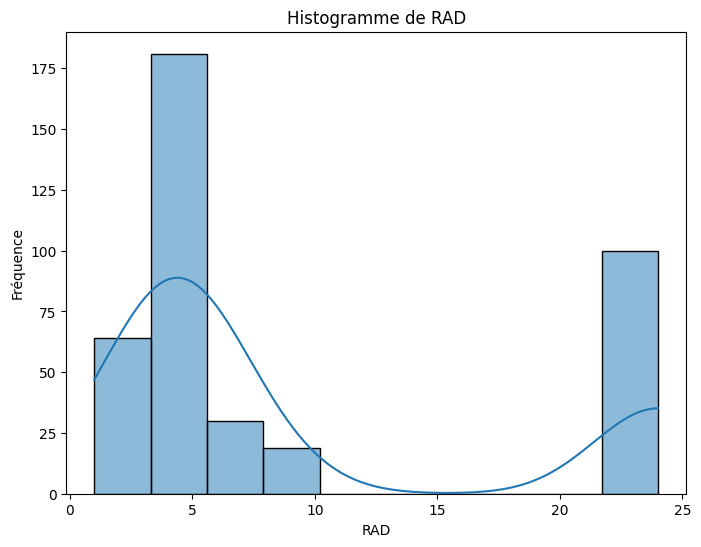

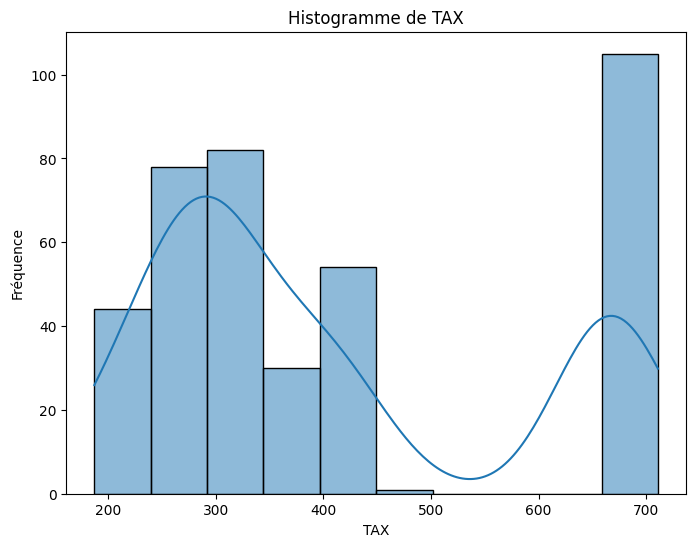

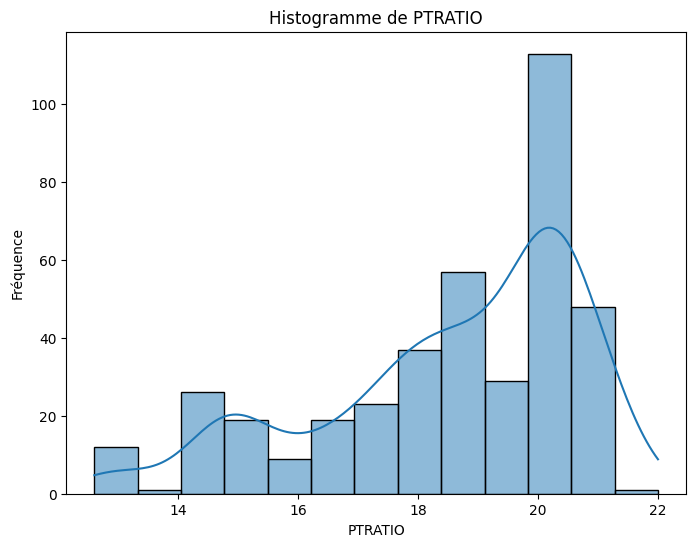

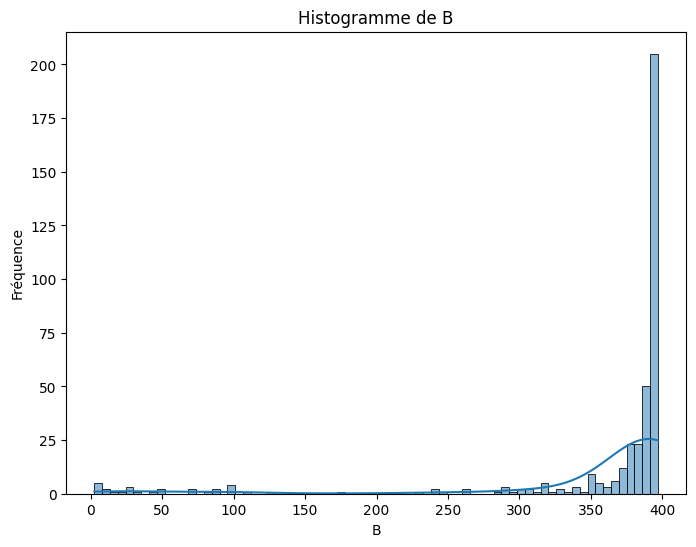

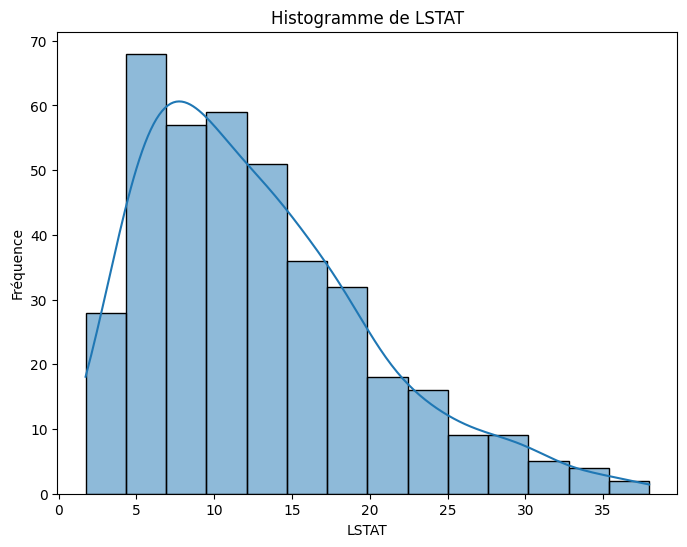

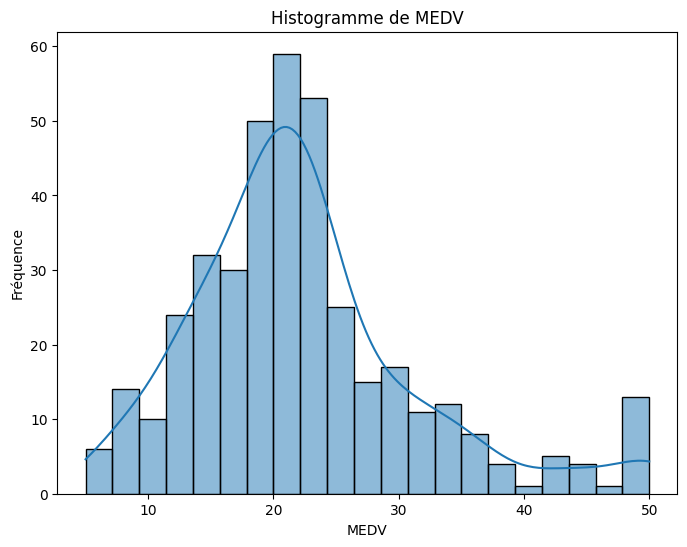

In [9]:
# Sélectionner uniquement les colonnes numériques
numerical_cols = data_cleaned.select_dtypes(include=['number'])

# Créer les histogrammes pour chaque colonne numérique
for col in numerical_cols.columns:
    plt.figure(figsize=(8, 6))  # Ajuster la taille de la figure si nécessaire
    sns.histplot(data_cleaned[col], kde=True)  # Ajouter kde=True pour afficher la densité
    plt.title(f'Histogramme de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.show()

In [10]:
# Convertir la variable CHAS en variable catégorielle
data_cleaned['CHAS'] = data_cleaned['CHAS'].astype('category')

/tmp/ipykernel_134729/2631606635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['CHAS'] = data_cleaned['CHAS'].astype('category')


/root/.pyenv/versions/3.10.12/envs/artefact/lib/python3.10/site-packages/seaborn/categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


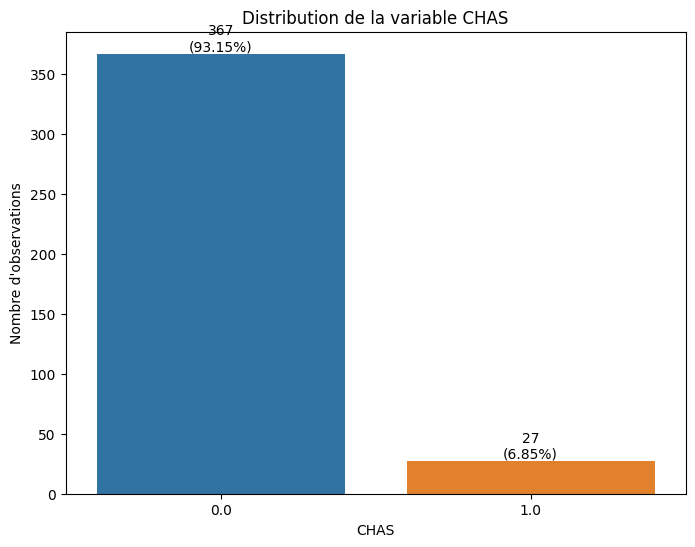

In [11]:
# Calculate counts and proportions for CHAS
chas_counts = data_cleaned['CHAS'].value_counts()
chas_proportions = data_cleaned['CHAS'].value_counts(normalize=True)

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='CHAS', data=data_cleaned)
plt.title('Distribution de la variable CHAS')
plt.xlabel('CHAS')
plt.ylabel('Nombre d\'observations')

# Add counts and proportions as text annotations
for i, count in enumerate(chas_counts):
    proportion = chas_proportions[i]
    plt.text(i, count, f'{count}\n({proportion:.2%})', ha='center', va='bottom')

plt.show()

------------------------------------------------------------------------------------------------------------

4- Sélectionner les variables les plus pertinentes

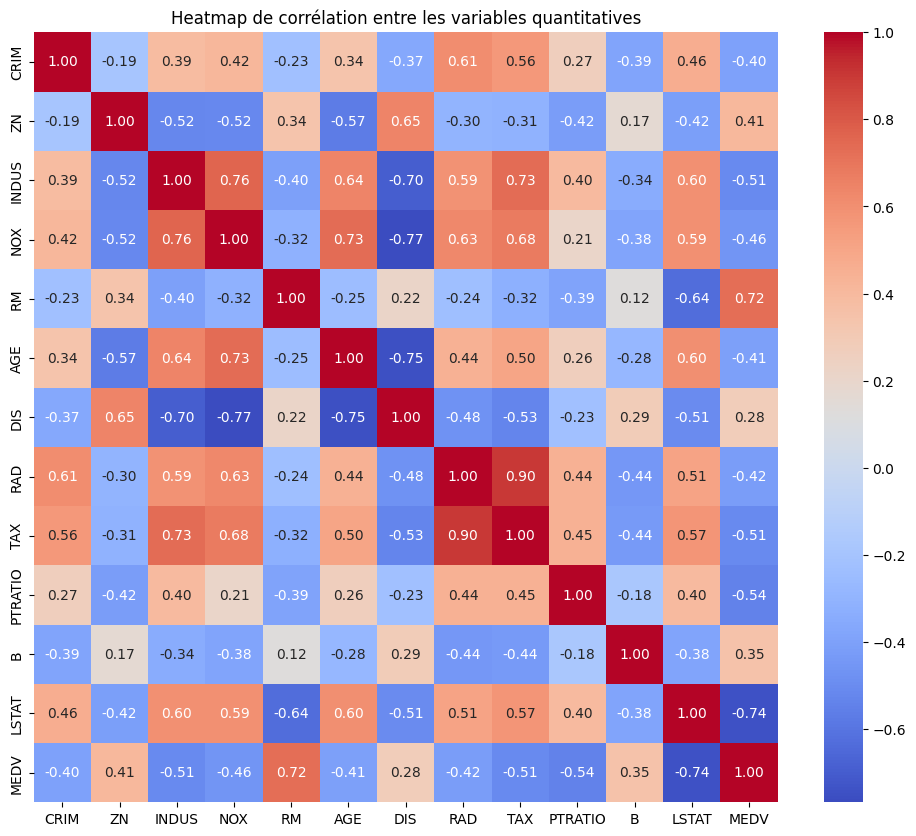

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélectionner uniquement les colonnes numériques pour la heatmap de corrélation
numerical_cols = data_cleaned.select_dtypes(include=['number'])

# Calculer la matrice de corrélation
correlation_matrix = numerical_cols.corr()

# Créer la heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de corrélation entre les variables quantitatives')
plt.show()

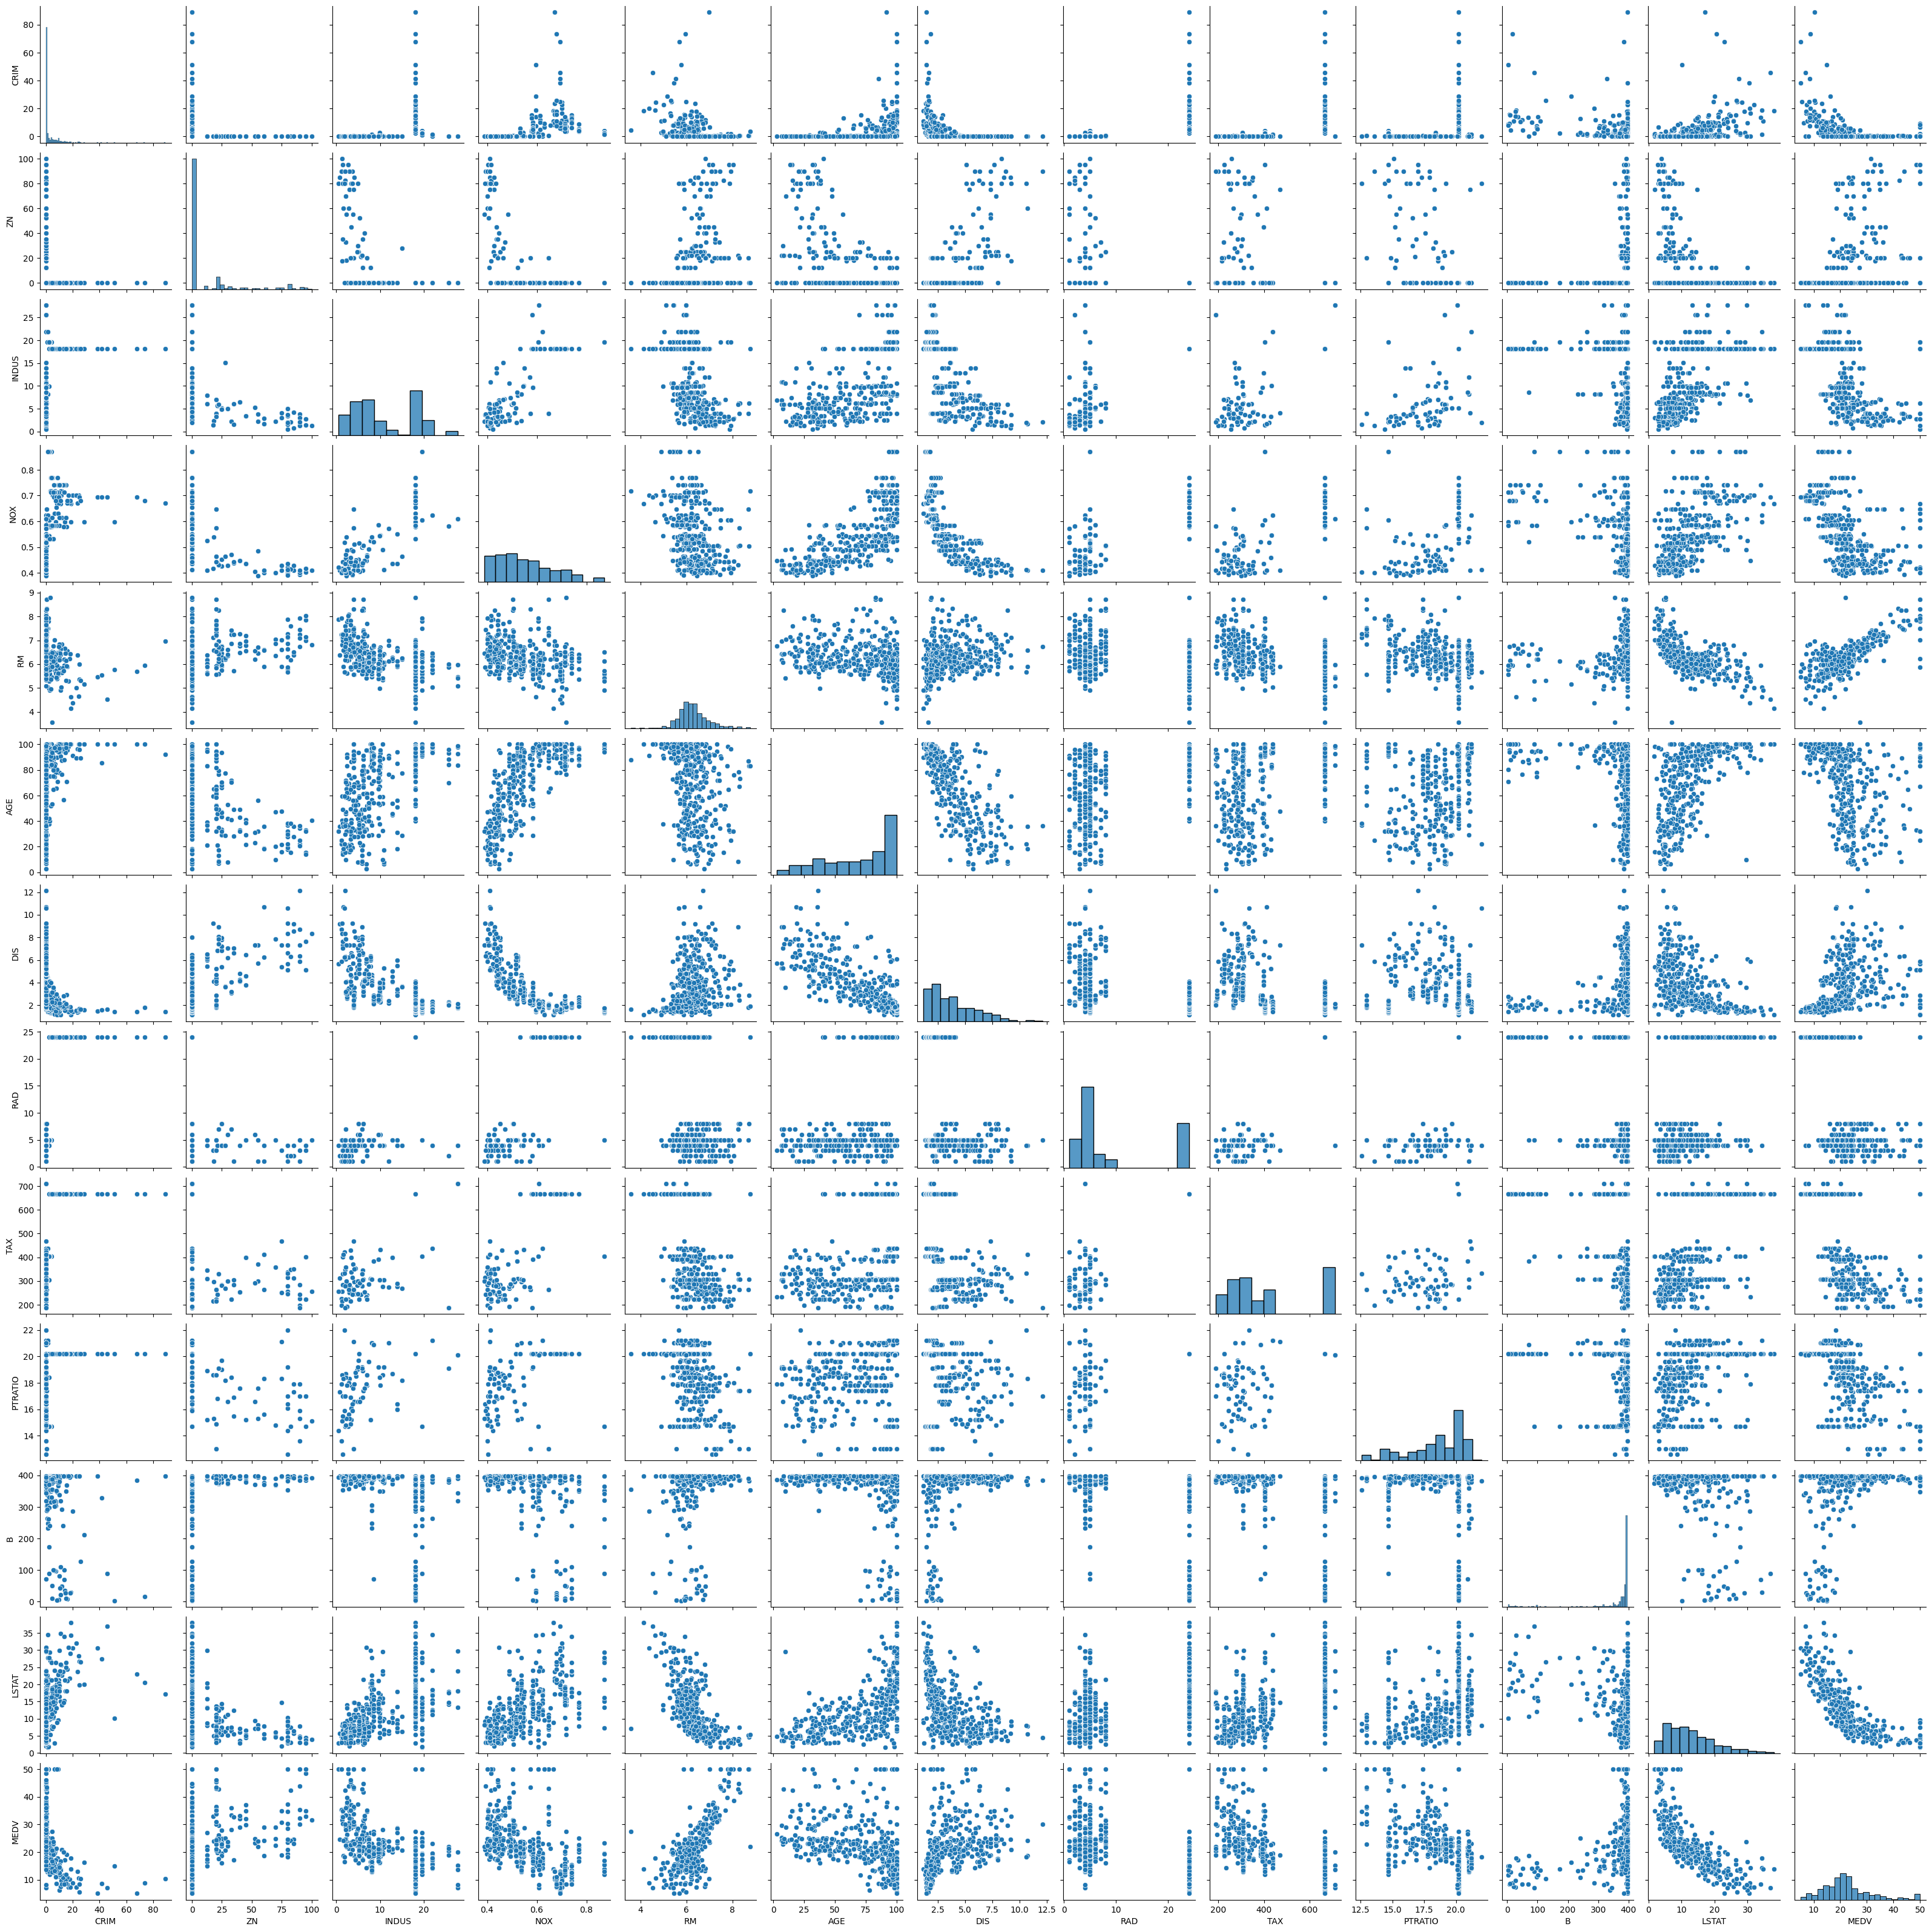

In [13]:

# Sélectionner uniquement les colonnes numériques pour le pairplot
numerical_cols = data_cleaned.select_dtypes(include=['number'])

# Créer le pairplot
sns.pairplot(numerical_cols)
plt.show()

/root/.pyenv/versions/3.10.12/envs/artefact/lib/python3.10/site-packages/seaborn/categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


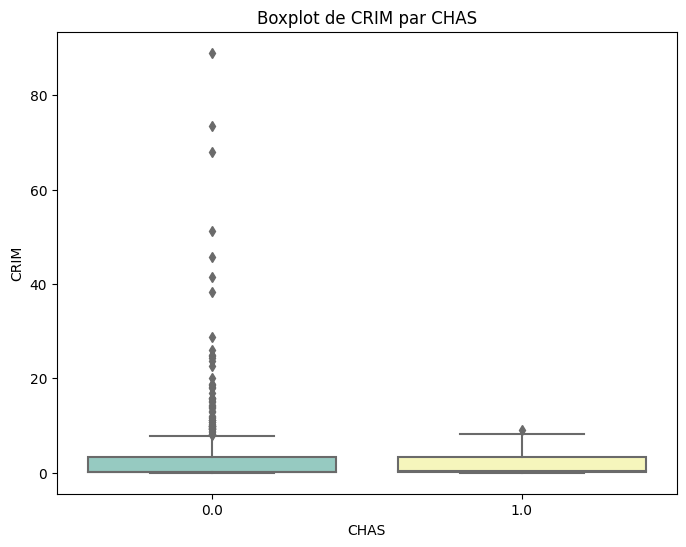

Kruskal-Wallis Test for CRIM:
Statistic: 0.60
P-value: 0.437
There is no statistically significant difference between groups.



/root/.pyenv/versions/3.10.12/envs/artefact/lib/python3.10/site-packages/seaborn/categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


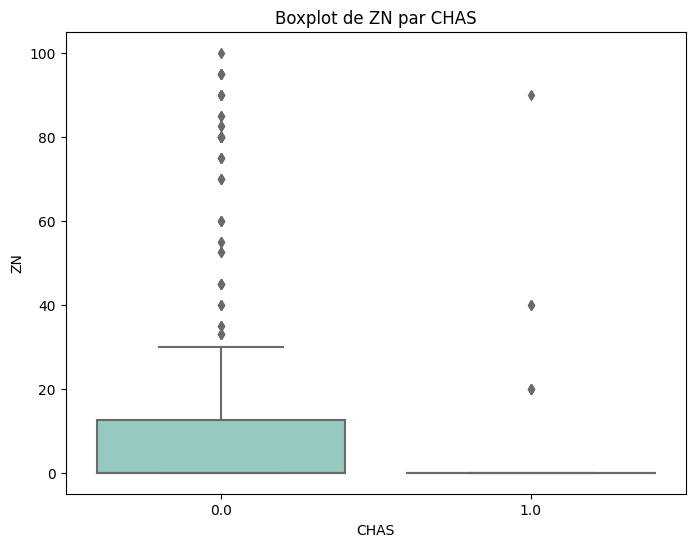

Kruskal-Wallis Test for ZN:
Statistic: 0.31
P-value: 0.576
There is no statistically significant difference between groups.



/root/.pyenv/versions/3.10.12/envs/artefact/lib/python3.10/site-packages/seaborn/categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


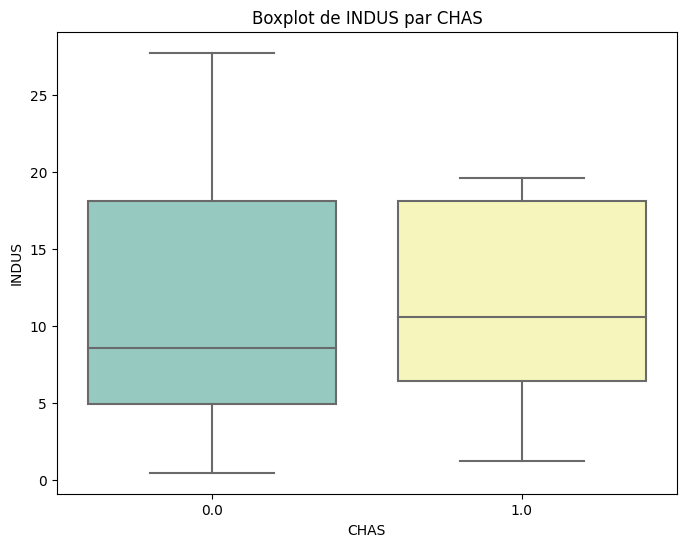

Kruskal-Wallis Test for INDUS:
Statistic: 2.05
P-value: 0.153
There is no statistically significant difference between groups.



/root/.pyenv/versions/3.10.12/envs/artefact/lib/python3.10/site-packages/seaborn/categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


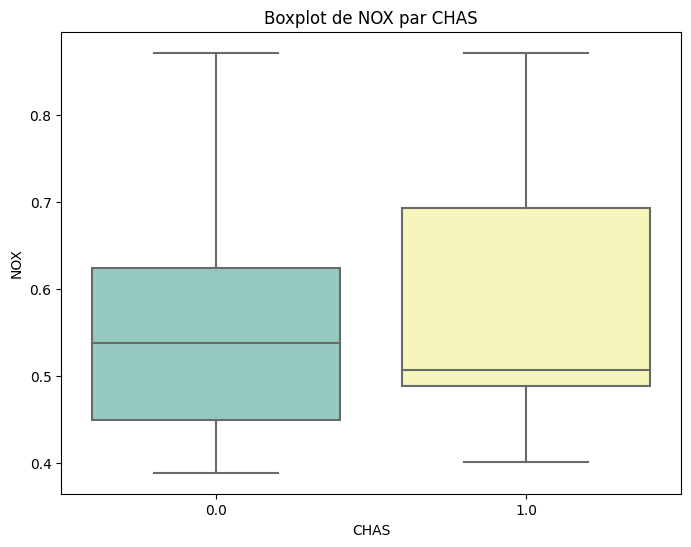

Kruskal-Wallis Test for NOX:
Statistic: 1.12
P-value: 0.290
There is no statistically significant difference between groups.



/root/.pyenv/versions/3.10.12/envs/artefact/lib/python3.10/site-packages/seaborn/categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


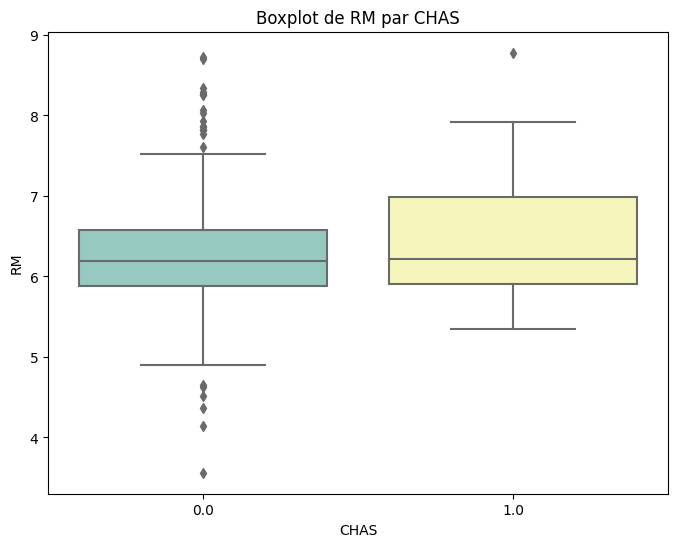

Kruskal-Wallis Test for RM:
Statistic: 1.08
P-value: 0.298
There is no statistically significant difference between groups.



/root/.pyenv/versions/3.10.12/envs/artefact/lib/python3.10/site-packages/seaborn/categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


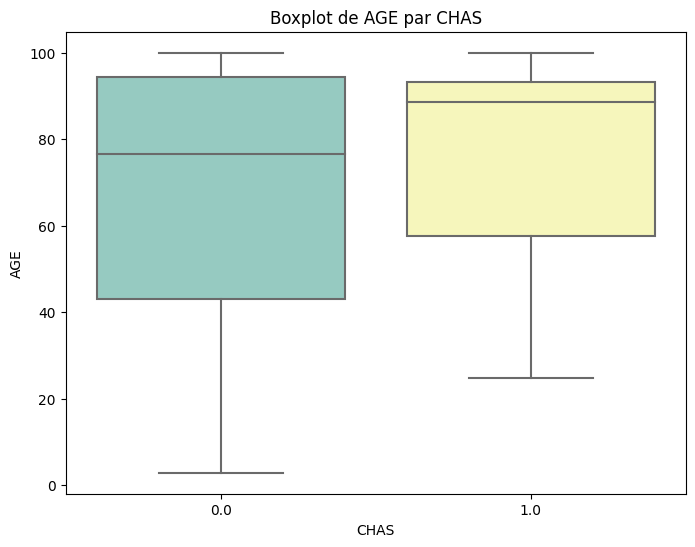

Kruskal-Wallis Test for AGE:
Statistic: 1.29
P-value: 0.256
There is no statistically significant difference between groups.



/root/.pyenv/versions/3.10.12/envs/artefact/lib/python3.10/site-packages/seaborn/categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


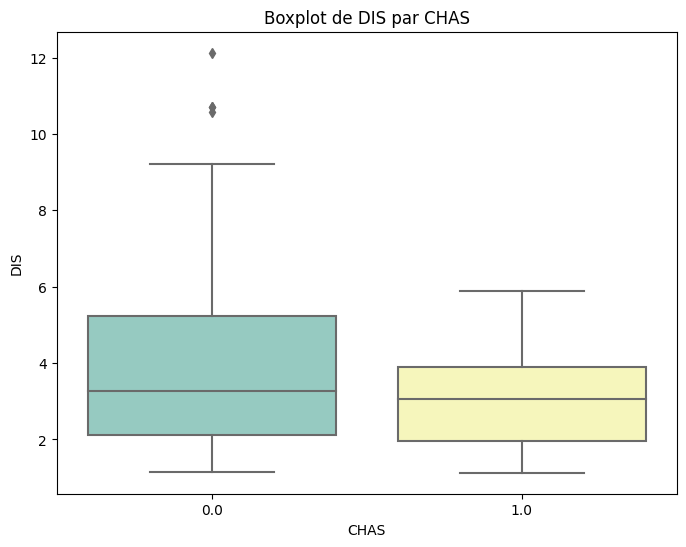

Kruskal-Wallis Test for DIS:
Statistic: 2.07
P-value: 0.151
There is no statistically significant difference between groups.



/root/.pyenv/versions/3.10.12/envs/artefact/lib/python3.10/site-packages/seaborn/categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


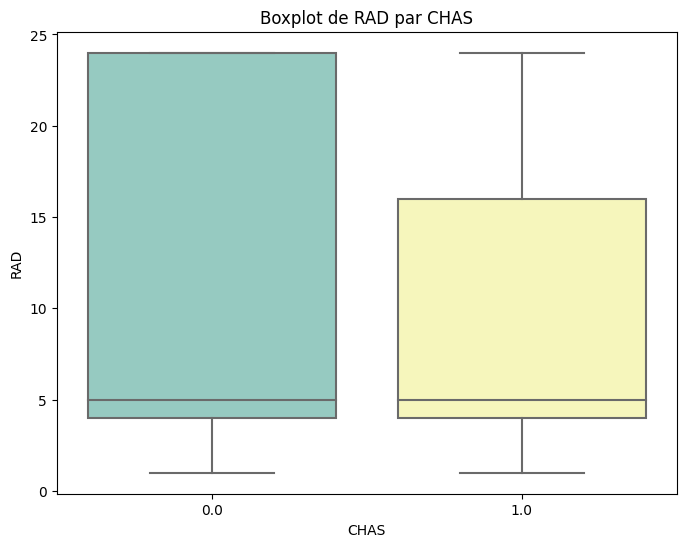

Kruskal-Wallis Test for RAD:
Statistic: 0.48
P-value: 0.489
There is no statistically significant difference between groups.



/root/.pyenv/versions/3.10.12/envs/artefact/lib/python3.10/site-packages/seaborn/categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


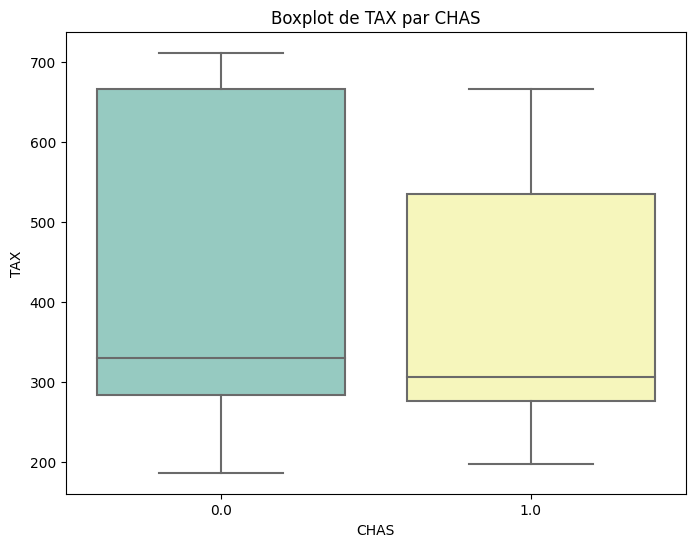

/root/.pyenv/versions/3.10.12/envs/artefact/lib/python3.10/site-packages/seaborn/categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


Kruskal-Wallis Test for TAX:
Statistic: 0.87
P-value: 0.351
There is no statistically significant difference between groups.



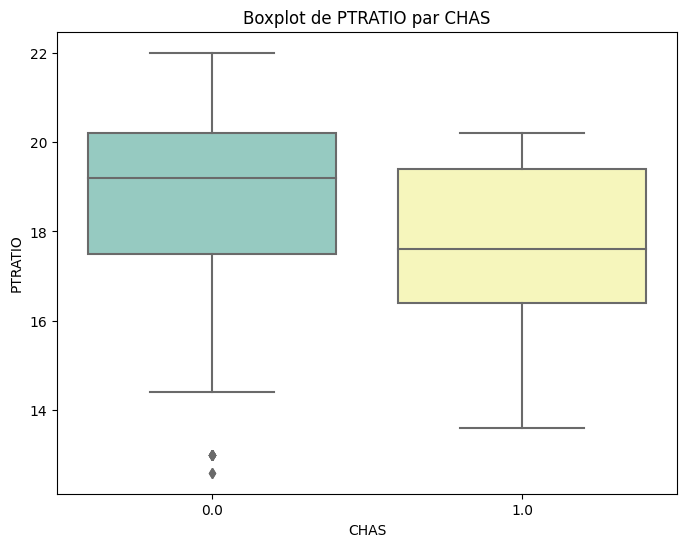

Kruskal-Wallis Test for PTRATIO:
Statistic: 5.86
P-value: 0.015
There is a statistically significant difference between groups.



/root/.pyenv/versions/3.10.12/envs/artefact/lib/python3.10/site-packages/seaborn/categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


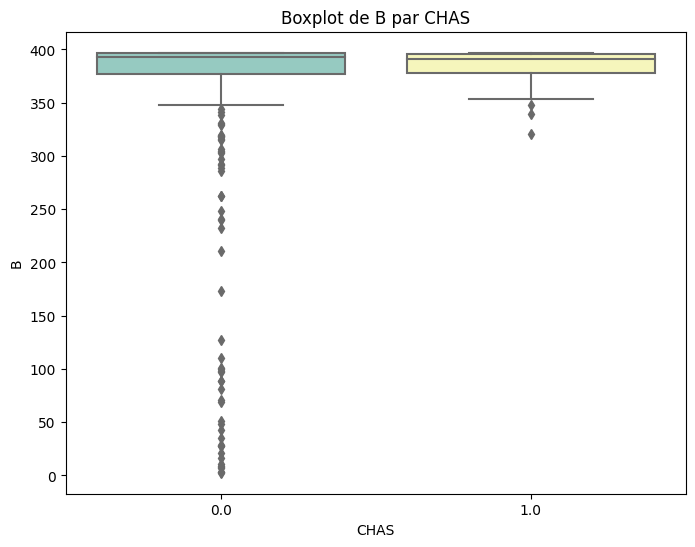

Kruskal-Wallis Test for B:
Statistic: 0.42
P-value: 0.516
There is no statistically significant difference between groups.



/root/.pyenv/versions/3.10.12/envs/artefact/lib/python3.10/site-packages/seaborn/categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


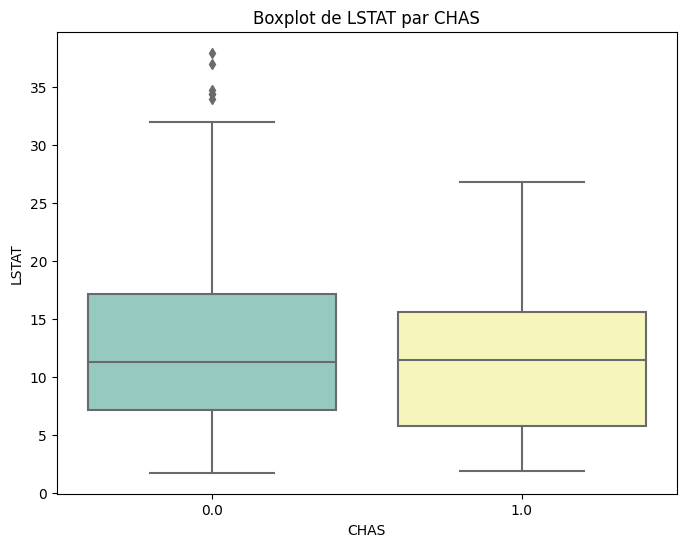

Kruskal-Wallis Test for LSTAT:
Statistic: 0.42
P-value: 0.518
There is no statistically significant difference between groups.



/root/.pyenv/versions/3.10.12/envs/artefact/lib/python3.10/site-packages/seaborn/categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


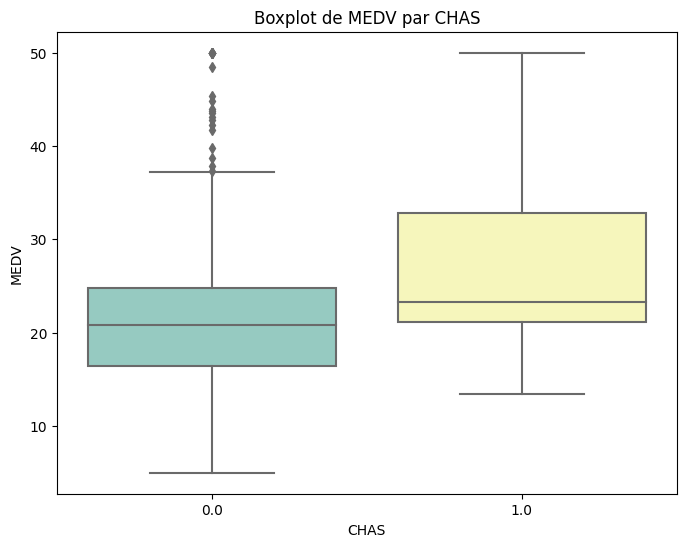

Kruskal-Wallis Test for MEDV:
Statistic: 8.23
P-value: 0.004
There is a statistically significant difference between groups.



In [14]:
# prompt: peux tu générer boxplot bivariée entre la variable qualitative et toutes les variables quantitatives peux tu mettre des couleur différentes par modalité? et ajoute un tableau avec le kruskall wallis,

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal

# Assuming 'data_cleaned' is your DataFrame and 'CHAS' is your qualitative variable

# List of numerical columns
numerical_cols = data_cleaned.select_dtypes(include=['number']).columns

# Create boxplots and perform Kruskal-Wallis test
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='CHAS', y=col, data=data_cleaned, palette="Set3")
    plt.title(f'Boxplot de {col} par CHAS')
    plt.show()

    # Kruskal-Wallis test
    groups = [data_cleaned[col][data_cleaned['CHAS'] == i] for i in data_cleaned['CHAS'].unique()]
    statistic, p_value = kruskal(*groups)
    print(f"Kruskal-Wallis Test for {col}:")
    print(f"Statistic: {statistic:.2f}")
    print(f"P-value: {p_value:.3f}")
    if p_value < 0.05:
        print("There is a statistically significant difference between groups.\n")
    else:
        print("There is no statistically significant difference between groups.\n")

--------------------------------------------------------------------------------------------------------------

5- Tester plusieurs modèles (du plus simple au plus complexe)

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'data_cleaned' is your DataFrame and 'MEDV' is your target variable

# Define features (X) and target (y)
X = data_cleaned.drop('MEDV', axis=1)
y = data_cleaned['MEDV']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True) #Drop first to avoid multicollinearity

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
X_test

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_1.0
93,0.02875,28.0,15.04,0.464,6.211,28.9,3.6659,4,270,18.2,396.33,6.21,0
352,0.07244,60.0,1.69,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79,0
319,0.47547,0.0,9.90,0.544,6.113,58.8,4.0019,4,304,18.4,396.23,12.73,0
65,0.03584,80.0,3.37,0.398,6.290,17.8,6.6115,4,337,16.1,396.90,4.67,0
499,0.17783,0.0,9.69,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,4.34879,0.0,18.10,0.580,6.167,84.0,3.0334,24,666,20.2,396.90,16.29,0
97,0.12083,0.0,2.89,0.445,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,0
137,0.35233,0.0,21.89,0.624,6.454,98.4,1.8498,4,437,21.2,394.08,14.59,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,0


In [19]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([29.22850199, 17.5037472 , 21.80803847, 30.4942528 , 18.50265527,
       34.7432311 , 22.07369779, 30.7541295 , 33.52029866, 14.82910783,
       22.14507214, 41.26427356, 22.51242483, 16.87300668, 19.0023074 ,
       20.77110711, 17.26921288, 15.48568273, 22.69482862, 14.12652975,
       18.19319969, 20.48292217, 17.04235173, 29.66737037, 26.09718411,
       16.06132841, 27.09746911, 31.45656662, 22.64238912, 27.06681913,
       41.10181897, 18.21320236, 23.062681  , 17.41202659, 17.39546606,
       21.076803  , 22.38598488, 21.66963934, 22.9118984 , 20.80249561,
       27.70046219, 34.60121409, 22.25931447, 30.83868791, 35.33229137,
       19.76393425, 24.99195034, 10.39133132, 19.75538217, 25.31114768,
       21.55934818, 25.89776968, 14.23212614, 18.66822307, 18.34126683,
       24.31756905, 43.40891373, 22.87668508, 15.3452895 , 23.17268086,
       21.11796307, 21.4821572 , 14.66508216, 28.92300146, -3.71655126,
       32.60224615, 16.81628299, 31.90077457, 24.78013157, 20.11

In [21]:
# prompt: peux tu ajouter dans le tableaux les caractéritiques la valeur observée et la valeur prédite?

# Create a DataFrame to store the results
results_df = pd.DataFrame({'Valeur Observée': y_test, 'Valeur Prédite': y_pred})

# Reset the index to avoid issues if the original index was not sequential
results_df = results_df.reset_index(drop=True)

# Add the features from X_test
results_df = pd.concat([X_test.reset_index(drop=True), results_df], axis=1)

results_df

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_1.0,Valeur Observée,Valeur Prédite
0,0.02875,28.0,15.04,0.464,6.211,28.9,3.6659,4,270,18.2,396.33,6.21,0,25.0,29.228502
1,0.07244,60.0,1.69,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79,0,18.6,17.503747
2,0.47547,0.0,9.90,0.544,6.113,58.8,4.0019,4,304,18.4,396.23,12.73,0,21.0,21.808038
3,0.03584,80.0,3.37,0.398,6.290,17.8,6.6115,4,337,16.1,396.90,4.67,0,23.5,30.494253
4,0.17783,0.0,9.69,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,0,17.5,18.502655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,4.34879,0.0,18.10,0.580,6.167,84.0,3.0334,24,666,20.2,396.90,16.29,0,19.9,19.265780
75,0.12083,0.0,2.89,0.445,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,0,38.7,35.607759
76,0.35233,0.0,21.89,0.624,6.454,98.4,1.8498,4,437,21.2,394.08,14.59,0,17.1,19.347960
77,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,0,33.4,28.489825


In [22]:
# prompt: stp donne dans un tableau sur la base de test et de train : le R2, le RMSE, le MSE , le MAPE  MAE et la corrélation pour valider la prédiction. je veux les valeurs sur la base d'apprentissage et la base de test

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error

def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    correlation = np.corrcoef(y_true, y_pred)[0, 1]

    return mse, rmse, mae, mape, r2, correlation

# Make predictions on the training set
y_pred_train = model.predict(X_train)


# Evaluate the model on the training set
mse_train, rmse_train, mae_train, mape_train, r2_train, correlation_train = evaluate_model(y_train, y_pred_train)

# Evaluate the model on the test set
mse_test, rmse_test, mae_test, mape_test, r2_test, correlation_test = evaluate_model(y_test, y_pred)


# Create a DataFrame to display the results
results = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'MAPE', 'R2', 'Correlation'],
    'Train': [mse_train, rmse_train, mae_train, mape_train, r2_train, correlation_train],
    'Test': [mse_test, rmse_test, mae_test, mape_test, r2_test, correlation_test]
})

results

,Metric,Train,Test
0,MSE,16.692213,31.454048
1,RMSE,4.085610,5.608391
2,MAE,2.961295,3.367983
3,MAPE,0.153711,0.146586
4,R2,0.797598,0.627085
5,Correlation,0.893084,0.794652


In [23]:
# prompt: peux tu faire une forêt aléaoire optimisé pour cette prédiction? et faire le tableau avec les performances sur la base d'apprentissage et la base de test?

from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)  # You can tune hyperparameters here
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf_train = rf_model.predict(X_train)
y_pred_rf_test = rf_model.predict(X_test)

# Evaluate the model
mse_rf_train, rmse_rf_train, mae_rf_train, mape_rf_train, r2_rf_train, correlation_rf_train = evaluate_model(y_train, y_pred_rf_train)
mse_rf_test, rmse_rf_test, mae_rf_test, mape_rf_test, r2_rf_test, correlation_rf_test = evaluate_model(y_test, y_pred_rf_test)

# Create a DataFrame to display the results
rf_results = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'MAPE', 'R2', 'Correlation'],
    'Train': [mse_rf_train, rmse_rf_train, mae_rf_train, mape_rf_train, r2_rf_train, correlation_rf_train],
    'Test': [mse_rf_test, rmse_rf_test, mae_rf_test, mape_rf_test, r2_rf_test, correlation_rf_test]
})

print("Random Forest Results:")
rf_results

Random Forest Results:


,Metric,Train,Test
0,MSE,1.646569,28.476436
1,RMSE,1.283187,5.336332
2,MAE,0.822044,2.777329
3,MAPE,0.044093,0.108589
4,R2,0.980035,0.662387
5,Correlation,0.990532,0.818192


In [24]:
# prompt: peux tu faire un xgboost optimisé pour cette prédiction? et faire le tableau avec les performances sur la base d'apprentissage et la base de test?

!pip install xgboost

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

# Assuming X and y are defined as in your previous code
# X = data_cleaned.drop('MEDV', axis=1)
# y = data_cleaned['MEDV']
# X = pd.get_dummies(X, drop_first=True)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # For regression
    'eval_metric': 'rmse',
    'eta': 0.1,  # Learning rate
    'max_depth': 6,  # Adjust as needed
    'subsample': 0.8, # Adjust as needed
    'colsample_bytree': 0.8 # Adjust as needed
}

# Train the XGBoost model
num_rounds = 100  # Adjust as needed
model = xgb.train(params, dtrain, num_rounds)

# Make predictions
y_pred_train = model.predict(dtrain)
y_pred_test = model.predict(dtest)

def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    correlation = np.corrcoef(y_true, y_pred)[0, 1]
    return mse, rmse, mae, mape, r2, correlation

# Evaluate the model
mse_train, rmse_train, mae_train, mape_train, r2_train, correlation_train = evaluate_model(y_train, y_pred_train)
mse_test, rmse_test, mae_test, mape_test, r2_test, correlation_test = evaluate_model(y_test, y_pred_test)

# Create a DataFrame to display the results
xgb_results = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'MAPE', 'R2', 'Correlation'],
    'Train': [mse_train, rmse_train, mae_train, mape_train, r2_train, correlation_train],
    'Test': [mse_test, rmse_test, mae_test, mape_test, r2_test, correlation_test]
})

print("XGBoost Results:")
xgb_results


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
XGBoost Results:


,Metric,Train,Test
0,MSE,0.098440,27.414410
1,RMSE,0.313751,5.235877
2,MAE,0.234258,2.715186
3,MAPE,0.012647,0.106101
4,R2,0.998806,0.674978
5,Correlation,0.999419,0.824041


In [25]:
# prompt: peux tu faire un lightgbm optimisé pour cette prédiction? et faire le tableau avec les performances sur la base d'apprentissage et la base de test?

!pip install lightgbm

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import numpy as np

# Assuming X and y are defined as in your previous code
# X = data_cleaned.drop('MEDV', axis=1)
# y = data_cleaned['MEDV']
# X = pd.get_dummies(X, drop_first=True)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create LightGBM datasets
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Define LightGBM parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',  # or other relevant metrics like mae, l1, l2
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'num_leaves': 31,        # Adjust as needed
    'learning_rate': 0.05,  # Adjust as needed
    'feature_fraction': 0.9, # Adjust as needed
    'bagging_fraction': 0.8, # Adjust as needed
    'bagging_freq': 5,       # Adjust as needed
    'verbose': 0
}


# Train the LightGBM model
num_round = 100  # Adjust as needed
model = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Make predictions
y_pred_train = model.predict(X_train, num_iteration=model.best_iteration)
y_pred_test = model.predict(X_test, num_iteration=model.best_iteration)

# Evaluate the model
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    correlation = np.corrcoef(y_true, y_pred)[0, 1]
    return mse, rmse, mae, mape, r2, correlation

mse_train, rmse_train, mae_train, mape_train, r2_train, correlation_train = evaluate_model(y_train, y_pred_train)
mse_test, rmse_test, mae_test, mape_test, r2_test, correlation_test = evaluate_model(y_test, y_pred_test)

# Create a DataFrame to display the results
lgb_results = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'MAPE', 'R2', 'Correlation'],
    'Train': [mse_train, rmse_train, mae_train, mape_train, r2_train, correlation_train],
    'Test': [mse_test, rmse_test, mae_test, mape_test, r2_test, correlation_test]
})

print("LightGBM Results:")
lgb_results

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 3.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

,Metric,Train,Test
0,MSE,4.942865,31.592425
1,RMSE,2.223256,5.620714
2,MAE,1.495377,3.144430
3,MAPE,0.077520,0.120350
4,R2,0.940065,0.625444
5,Correlation,0.970348,0.793967


In [26]:
# prompt: peux tu faire un catboost optimisé pour cette prédiction? et faire le tableau avec les performances sur la base d'apprentissage et la base de test?

!pip install catboost

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from catboost import CatBoostRegressor

# Assuming X and y are defined as in your previous code (after one-hot encoding)
# ... (your code to prepare X and y) ...

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=1000, # Adjust as needed
                          learning_rate=0.05, # Adjust as needed
                          depth=6,            # Adjust as needed
                          loss_function='RMSE',
                          eval_metric='RMSE',
                          random_seed=42,
                          verbose=100) # Adjust verbosity


# Fit the model
model.fit(X_train, y_train, eval_set=(X_test, y_test))

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    correlation = np.corrcoef(y_true, y_pred)[0, 1]
    return mse, rmse, mae, mape, r2, correlation


# Evaluate the model
mse_train, rmse_train, mae_train, mape_train, r2_train, correlation_train = evaluate_model(y_train, y_pred_train)
mse_test, rmse_test, mae_test, mape_test, r2_test, correlation_test = evaluate_model(y_test, y_pred_test)


# Create a DataFrame to display the results
catboost_results = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'MAPE', 'R2', 'Correlation'],
    'Train': [mse_train, rmse_train, mae_train, mape_train, r2_train, correlation_train],
    'Test': [mse_test, rmse_test, mae_test, mape_test, r2_test, correlation_test]
})

print("CatBoost Results:")
catboost_results

  Using cached catboost-1.2.7-cp310-cp310-manylinux2014_x86_64.whl.metadata (1.2 kB)
Using cached catboost-1.2.7-cp310-cp310-manylinux2014_x86_64.whl (98.7 MB)

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
0:	learn: 8.8157129	test: 9.1420453	best: 9.1420453 (0)	total: 72.7ms	remaining: 1m 12s
100:	learn: 2.1923919	test: 5.4646542	best: 5.4646542 (100)	total: 249ms	remaining: 2.22s
200:	learn: 1.4315551	test: 5.0416240	best: 5.0416240 (200)	total: 385ms	remaining: 1.53s
300:	learn: 1.0536457	test: 4.8975310	best: 4.8975310 (300)	total: 501ms	remaining: 1.16s
400:	learn: 0.7841542	test: 4.8414909	best: 4.8394905 (399)	total: 634ms	remaining: 947ms
500:	learn: 0.5826428	test: 4.8240199	best: 4.8240199 (500)	total: 751ms	remaining: 748ms
600:	learn: 0.4530028	test: 4.8200141	best: 4.8186047 (552)	total: 893ms	remaining: 593ms
700:	learn: 0.3629231	test: 4.8209145	best: 4.8186047 (552)	total: 1.01s	remaining: 432ms
800:	learn:

,Metric,Train,Test
0,MSE,0.254289,23.218951
1,RMSE,0.504270,4.818605
2,MAE,0.399356,2.570364
3,MAPE,0.022087,0.103513
4,R2,0.996917,0.724719
5,Correlation,0.998489,0.855023


---------------------------------------------------------------------------
6- Choisir le meilleur modèle

Choix: forêt aléatoire

Mise en production du modèle 